### Import required Libraries

In [2]:
import nltk
import re
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/vatsal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vatsal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/vatsal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Read the text and apply Preprocessing

### Read the text file

In [3]:
file = open('./sommerville.txt', 'r', encoding='utf-8')
T1 = file.read()

### Apply the preprocessing

In [4]:
# Remove Footer
T1 = re.sub('.* 4/4/06 .*\n', '', T1)
T1 = re.sub('[ ]*••[ ]*••\n', '', T1)

# Remove Header
T1 = re.sub('[0-9]+[ ]+Chapter.*\n', '', T1)
T1 = re.sub('[0-9]+.[0-9]+ ■.*[0-9]+\n', '', T1)
T1 = re.sub('Chapter [0-9]+ ■.*[0-9]+\n', '', T1)

# Remove all heading from the Text
T1 = re.sub(r'\d+(\.\d+)*\.\d+.*\n', '', T1)

# Remove Chapter Title
T1 = re.sub('[0-9]+\n[a-zA-Z ]+\n', '', T1)

# Join broken words
T1 = re.sub(r'-\n\s*', '', T1)

#Removing punctuations
punctuations = '''!()-[]{};:'"\,<>./‘’?“”@#$%^&*_~■'''
cleantext = ""
for char in T1:
    if char not in punctuations:
        cleantext = cleantext + char

T1 = cleantext

# Remove tables 
arr = T1.split('\n')

allLines = []

idx = 0

for i in range(0, len(arr)):
  # Split each line into columns based on groups of spaces
  temp = re.split(r'\s{2,}', arr[i])
  if len(temp) <= 2:
    allLines.insert(idx, temp)
    idx += 1

finalText = ''
for k in allLines: 
  if (len(k) > 1):
    finalText += ' ' + k[1].lower()

finalText[:2500]

'  objectives the objectives of this chapter are to introduce software engineering and to provide a framework for understanding the rest of the book when you have read this chapter you will understand what software engineering is and why it is important know the answers to key questions that provide an introduction to software engineering understand some ethical and professional issues that are important for software engineers contents   virtually all countries now depend on complex computerbased systems national infrastructures and utilities rely on computerbased systems and most electrical products include a computer and controlling software industrial manufacturing and distribution is completely computerised as is the financial system therefore producing and maintaining software costeffectively is essential for the functioning of national and international economies software engineering is an engineering discipline whose focus is the costeffective development of highquality software

## Create WordCloud with stopwords

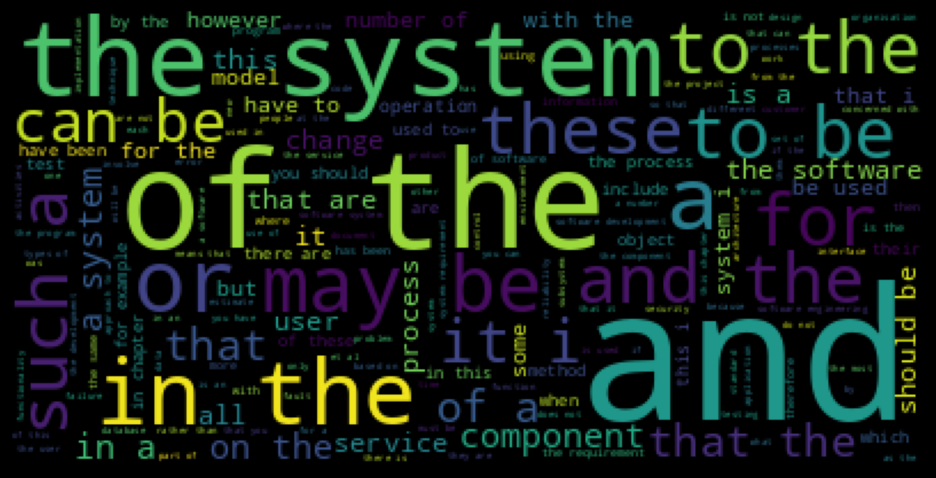

In [5]:
# We don't apply tokenization here because the library used here requires a string
# Creating a wordcloud before removing StopWords
wordcloud = WordCloud(stopwords={}, background_color='black').generate(finalText)

# Plotting the wordcloud
plt.figure(figsize = (10,10), facecolor = 'black') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 3) 
plt.show() 

## Tokenize the text

In [6]:
#Tokenizing the text
tokens = nltk.word_tokenize(finalText)
tokens

['objectives',
 'the',
 'objectives',
 'of',
 'this',
 'chapter',
 'are',
 'to',
 'introduce',
 'software',
 'engineering',
 'and',
 'to',
 'provide',
 'a',
 'framework',
 'for',
 'understanding',
 'the',
 'rest',
 'of',
 'the',
 'book',
 'when',
 'you',
 'have',
 'read',
 'this',
 'chapter',
 'you',
 'will',
 'understand',
 'what',
 'software',
 'engineering',
 'is',
 'and',
 'why',
 'it',
 'is',
 'important',
 'know',
 'the',
 'answers',
 'to',
 'key',
 'questions',
 'that',
 'provide',
 'an',
 'introduction',
 'to',
 'software',
 'engineering',
 'understand',
 'some',
 'ethical',
 'and',
 'professional',
 'issues',
 'that',
 'are',
 'important',
 'for',
 'software',
 'engineers',
 'contents',
 'virtually',
 'all',
 'countries',
 'now',
 'depend',
 'on',
 'complex',
 'computerbased',
 'systems',
 'national',
 'infrastructures',
 'and',
 'utilities',
 'rely',
 'on',
 'computerbased',
 'systems',
 'and',
 'most',
 'electrical',
 'products',
 'include',
 'a',
 'computer',
 'and',
 'cont

### Plotting the frequency of words without removing stopwords

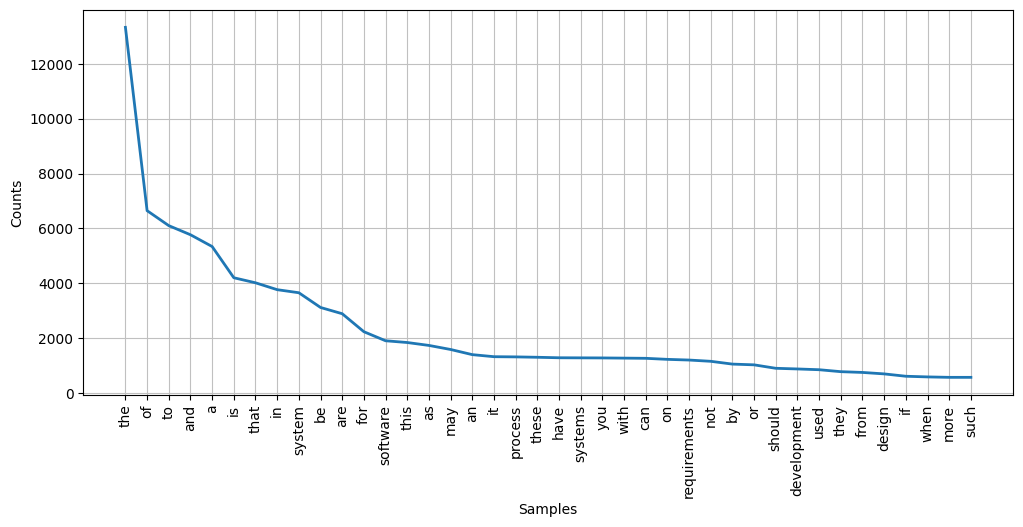

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [7]:
#Plotting Frequency Distribution before removing stopwords
freq = nltk.FreqDist(tokens)
plt.figure(figsize=(12,5))
freq.plot(40, cumulative=False)

## Removing the stopwords

### Removing stopwords

In [8]:
#Removing Stopwords
stop_words =set(stopwords.words('english'))
filtered_tokens =[w for w in tokens if w not in stop_words]
tokens = filtered_tokens
finalText = " "
finalText = finalText.join(tokens)

### Generating and plotting the WordCloud without stopwords

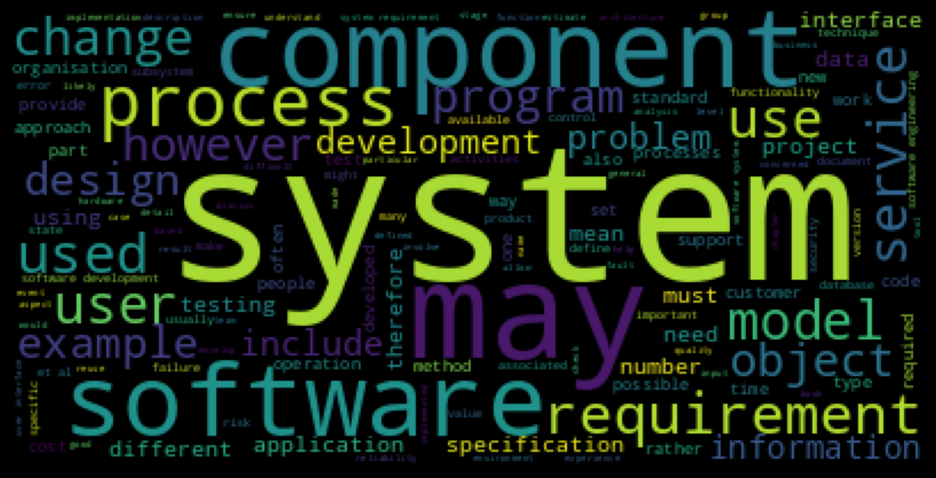

In [9]:
#Generating wordcloud after removing stopwords
wordcloud = WordCloud(stopwords={}, background_color='black').generate(finalText)

plt.figure(figsize = (10,10), facecolor = 'black') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 3) 
plt.show() 

### Words frequency plot after removing stopwords

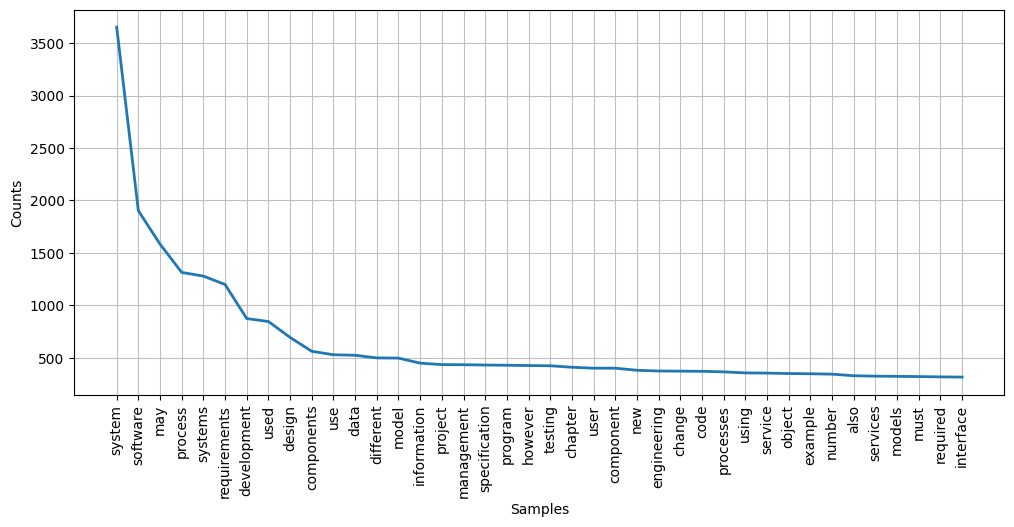

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [10]:
#Plotting Frequency Distribution after removing stopwords
tokens = nltk.word_tokenize(finalText)
freq = nltk.FreqDist(tokens)
plt.figure(figsize=(12,5))
freq.plot(40, cumulative=False)

### Plot of word length and frequency

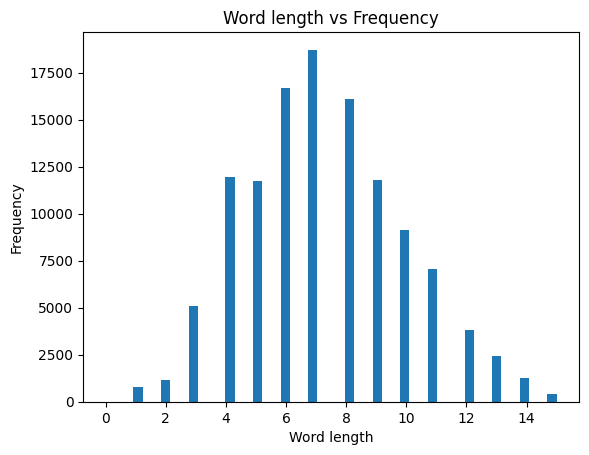

In [11]:
#Plotting relationship between Word Length and Frequency
wordLen = [len(w) for w in tokens]
plt.hist(wordLen, bins=np.linspace(0,15))

plt.xlabel('Word length')
plt.ylabel('Frequency')
plt.title('Word length vs Frequency')
plt.show()

## POS Tagging

### Perform POS Tagging 

In [12]:
#POS Tagging
postTag = nltk.pos_tag(tokens)
postTag

[('objectives', 'NNS'),
 ('objectives', 'VBZ'),
 ('chapter', 'NN'),
 ('introduce', 'NN'),
 ('software', 'NN'),
 ('engineering', 'NN'),
 ('provide', 'NN'),
 ('framework', 'NN'),
 ('understanding', 'VBG'),
 ('rest', 'JJ'),
 ('book', 'NN'),
 ('read', 'VBP'),
 ('chapter', 'NN'),
 ('understand', 'NN'),
 ('software', 'NN'),
 ('engineering', 'NN'),
 ('important', 'JJ'),
 ('know', 'VBP'),
 ('answers', 'NNS'),
 ('key', 'JJ'),
 ('questions', 'NNS'),
 ('provide', 'VBP'),
 ('introduction', 'NN'),
 ('software', 'NN'),
 ('engineering', 'NN'),
 ('understand', 'JJ'),
 ('ethical', 'JJ'),
 ('professional', 'NN'),
 ('issues', 'NNS'),
 ('important', 'JJ'),
 ('software', 'NN'),
 ('engineers', 'NNS'),
 ('contents', 'NNS'),
 ('virtually', 'RB'),
 ('countries', 'NNS'),
 ('depend', 'VBP'),
 ('complex', 'JJ'),
 ('computerbased', 'VBN'),
 ('systems', 'NNS'),
 ('national', 'JJ'),
 ('infrastructures', 'NNS'),
 ('utilities', 'NNS'),
 ('rely', 'VBP'),
 ('computerbased', 'JJ'),
 ('systems', 'NNS'),
 ('electrical', 'J

### Calculate the frequency and plot it

Counter({'NN': 45417, 'NNS': 20459, 'JJ': 20113, 'VBP': 6246, 'RB': 5764, 'VBG': 4818, 'VBN': 4655, 'VBD': 4426, 'VB': 3253, 'VBZ': 3048, 'MD': 2415, 'CD': 2199, 'IN': 1034, 'JJR': 308, 'RBR': 204, 'DT': 173, 'NNP': 168, 'JJS': 157, 'FW': 138, 'CC': 100, 'RP': 44, 'PRP': 44, 'WP$': 32, 'RBS': 15, 'WDT': 14, 'WRB': 14, '$': 8, 'WP': 4, 'POS': 3, 'PRP$': 3, 'NNPS': 2, 'SYM': 1, 'EX': 1})


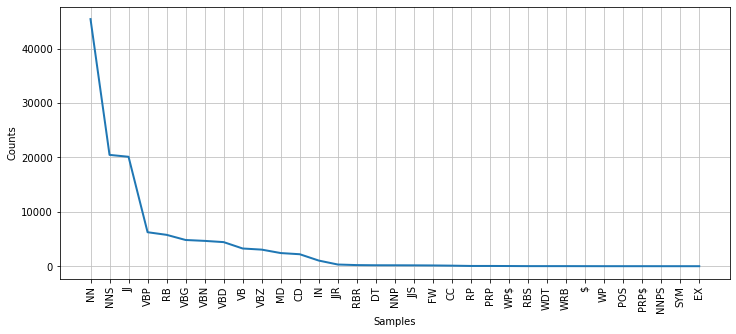

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [103]:
#Plotting Tag frequency
tagCount = Counter(tag for word, tag in postTag)
print(tagCount)
tagFreq = nltk.FreqDist(tagCount)
plt.figure(figsize=(12,5))
tagFreq.plot(40, cumulative=False)